In [1]:
import ephem
import datetime
import pylab             as     pl
import numpy             as     np
import matplotlib.pyplot as     plt

from   IPython.display   import Image
from   matplotlib        import animation, rc
from   IPython.display   import HTML

In [2]:
%matplotlib inline

In [3]:
venus = ephem.Venus()

venus.compute('2020/09/11 00:50:22')

print(venus.ra, venus.dec)

8:28:58.50 17:51:55.0


In [4]:
ephem.constellation(venus)

('Cnc', 'Cancer')

In [5]:
chichen_itza       = ephem.Observer()

chichen_itza.lat   = '20.683056'
chichen_itza.lon   = '88.568611'

In [53]:
# First rising date time:  2020/1/2 03:01:29

start_date         = datetime.datetime(2020, 1,   1)
start_time         = datetime.time(3, 1, 29)
start_datetime     = datetime.datetime.combine(start_date.date(), start_time)

end_date           = datetime.datetime(2028, 1, 1)

delta              = datetime.timedelta(hours=3)

datetimes          = []
angular_pos        = []

# [magnitude, diameter in arcseconds, earth_distance, phase]
props              = []

while start_datetime  <= end_date:    
    start_datetime    += delta
    
    chichen_itza.date  = start_datetime.strftime("%Y/%m/%d %H:%M:%S")
    
    venus.compute(chichen_itza)

    datetimes.append(start_datetime)

    props.append([venus.mag, venus.size, venus.earth_distance, venus.phase])
    
    angular_pos.append([chichen_itza.date, venus.az, venus.alt])
    
    # print('{} \t {:f} \t {:f} \t {} \t {}'.format(chichen_itza.date, venus.az, venus.alt, chichen_itza.next_rising(venus), chichen_itza.next_transit(venus)))

In [54]:
angular_pos = np.array(angular_pos)
props       = np.array(props)

In [55]:
years       = np.array([x.year for x in datetimes]) 
uyears      = np.unique(years)

In [56]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

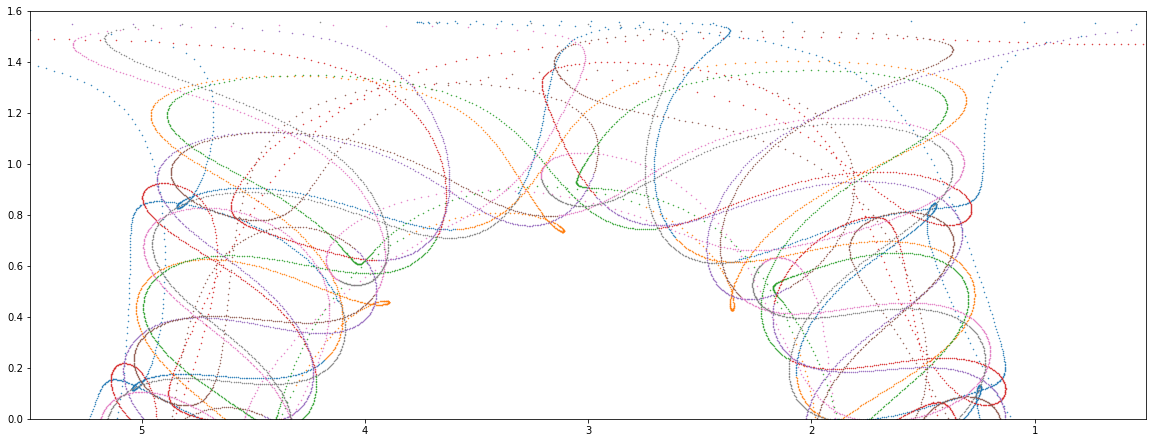

In [59]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

for color, year in zip(color_cycle, uyears):
    in_year = years == year

    ax.set_xlim(left=5.5, right=0.5)
    ax.set_ylim(bottom=0.0, top=1.6)
    
    # http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html
    ax.plot(angular_pos[in_year,1], angular_pos[in_year,2], marker='.', lw=0.0, markersize=1)
    
pl.savefig('images/venus.pdf')

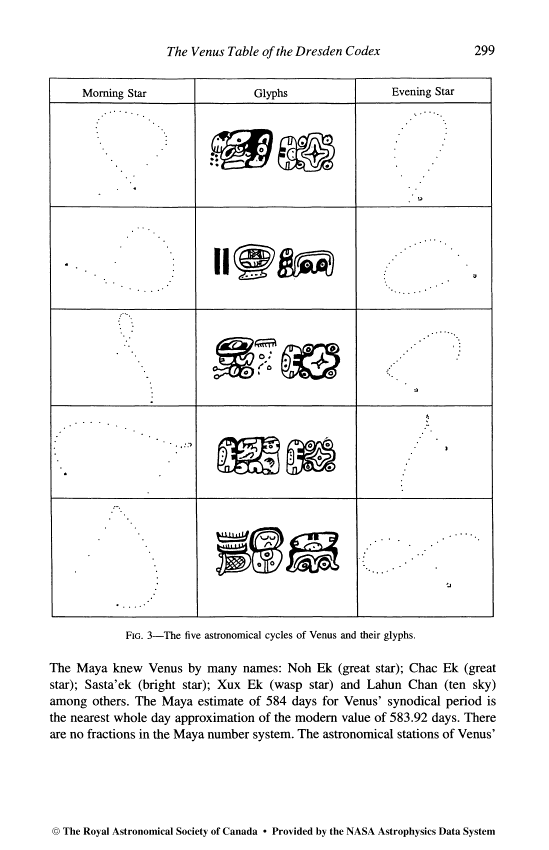

In [11]:
Image(filename='images/MayanGlyphs.gif')

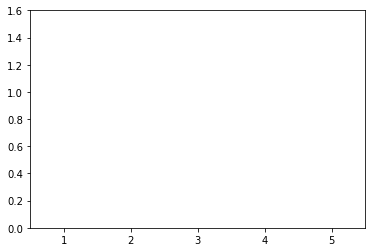

In [28]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(left=0.5, right=5.5)
ax.set_ylim(bottom=0.0, top=1.6)

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html
line, =  ax.plot([], [], marker='.', lw=2.0, markersize=10)

texts = [ax.text(0.80, 0.95,  '', transform=ax.transAxes) for i in range(len(angular_pos))]

In [13]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    
    return (line,)

In [29]:
# animation function. This is called sequentially
def animate(i):
    x = angular_pos[in_year,1][i]
    y = angular_pos[in_year,2][i]
    
    line.set_data(x, y)
    line.set_markersize(props[i, 1])
    
    texts[i].set_text('{}'.format(angular_pos[i, 0]))
    
    return (line,)

In [35]:
# call the animator. blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=100, interval=1.e3, blit=False, repeat=True)

In [34]:
# HTML(anim.to_html5_video())